In [89]:
import GPy
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal

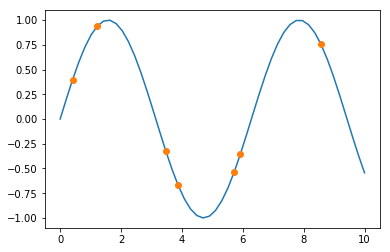

In [73]:
np.random.seed(5)
x = np.linspace(0, 10)[:, None]
y = np.sin(x)

X = np.random.choice(x.flatten(), 7, replace=False)[:, None]
Y = np.sin(X)

plt.plot(x, y)
plt.plot(X, Y, 'o')

In [74]:
kernel = GPy.kern.RBF(input_dim=1)
kernel

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


In [129]:
m = GPy.models.GPRegression(X, Y, kernel)
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f9acd282278>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f9acd1d9470>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f9acd1d98d0>]}

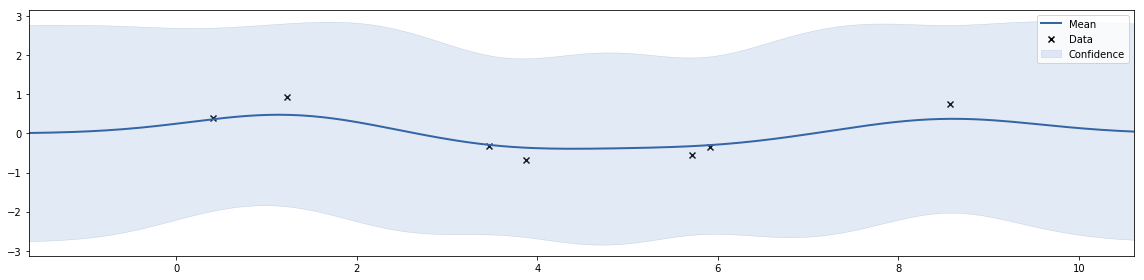

In [153]:
kernel = GPy.kern.RBF(input_dim=1)
m = GPy.models.GPRegression(X, Y, kernel)
m.plot(plot_density=False, figsize=(16, 4))

In [172]:
m.optimize()

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f9acd268978>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f9acd268940>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f9acd2689e8>]}

 /opt/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


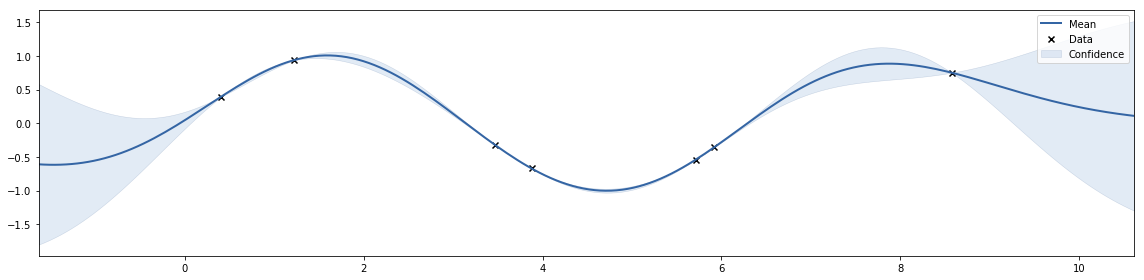

In [173]:
m.plot(plot_density=0, figsize=(16, 4))

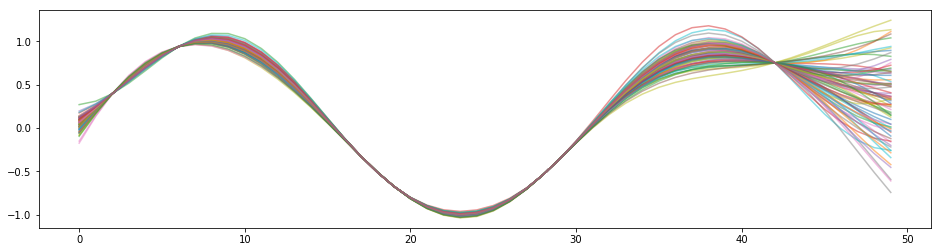

In [174]:
# make prediction by parameterizing Gaussian
mu, cov = m.predict(x, full_cov=True)
a = multivariate_normal(mu.flatten(), cov).rvs(75)

plt.figure(figsize=(16, 4))
for i in range(a.shape[0]):
    plt.plot(a[i, :], alpha=0.5)

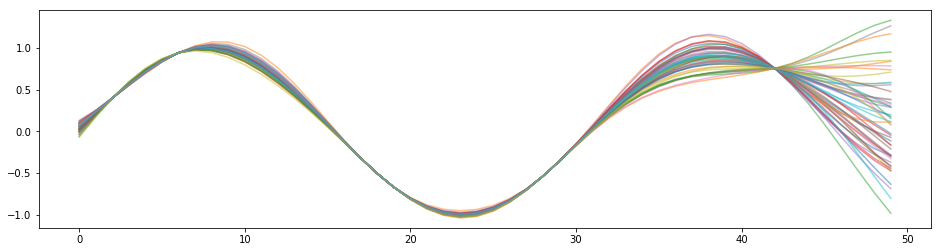

In [176]:
# or sample directly from posterior
a = m.posterior_samples(x, size=75)
a = np.squeeze(a)

plt.figure(figsize=(16, 4))
for i in range(a.shape[0]):
    plt.plot(a[:, i], alpha=0.5)

{'gpmean': [[<matplotlib.lines.Line2D at 0x7f9ace055ef0>],
  [<matplotlib.lines.Line2D at 0x7f9accedbd68>]]}

 /opt/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


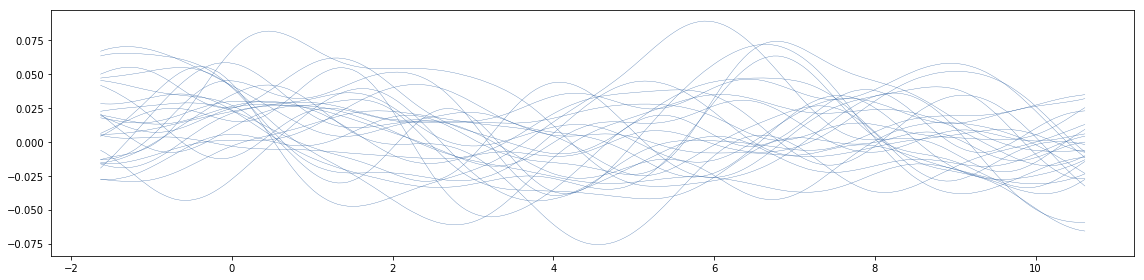

In [269]:
# plot prior
kernel = GPy.kern.RBF(input_dim=1, lengthscale=1, variance=0.001)
m = GPy.models.GPRegression(X, Y, kernel)
m.plot_samples(samples=25, figsize=(16, 4))